# Test scripts for health
Scripts to check in which ball park the overall health of players and monsters fall.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import time
np.set_printoptions(suppress=True)

## character health propability
The next code block tests the overall chances of different health outputs for a player.

Maximum probability is 10.440000000000001% for 111


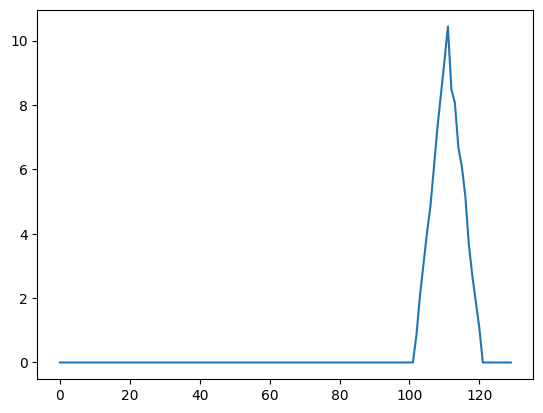

In [2]:
rolls = 10000

def character_health_probability(baseHealth, playerLevel, positiveTrait, negativeTrait, diceType):
    maxHealth = baseHealth + playerLevel*diceType + positiveTrait*diceType - negativeTrait*diceType
    probability = np.zeros(maxHealth)
    for i in range(rolls):
        health = baseHealth
        for j in range(playerLevel-1):
            health += randrange(diceType)+1

        for j in range(positiveTrait):
            health += randrange(diceType)+1

        for j in range(negativeTrait):
            health -= (randrange(diceType)+1)

        probability[health] += 1

    probability = (probability/rolls)*100

    maxProbability = 0
    maxHealthProbability = 0
    for i in range(maxHealth):
        if(maxProbability < probability[i]):
            maxProbability = probability[i]
            maxHealthProbability = i

    print("Maximum probability is " + str(maxProbability) + "%" + " for " + str(maxHealthProbability))

    plt.plot(probability)

character_health_probability(baseHealth=100, playerLevel=3, positiveTrait=0, negativeTrait=0, diceType=10)

## monster health propability
The next code block tests the overall chances of different health outputs for monsters.

Maximum probability is 9.43% for 86


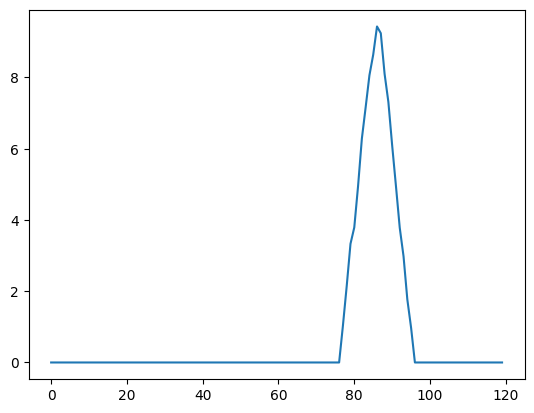

In [8]:
rolls = 10000

def monster_health_probability(baseHealth, monsterLevel, monsterClass, monsterModifier, diceType):
    maxHealth = baseHealth + monsterLevel*diceType + monsterClass*monsterModifier
    probability = np.zeros(maxHealth)
    for i in range(rolls):
        health = baseHealth
        for j in range(monsterLevel):
            health += randrange(diceType)+1
        health += (monsterClass-1)*monsterModifier

        probability[health] += 1

    probability = (probability/rolls)*100

    maxProbability = 0
    maxHealthProbability = 0
    for i in range(maxHealth):
        if(maxProbability < probability[i]):
            maxProbability = probability[i]
            maxHealthProbability = i

    print("Maximum probability is " + str(maxProbability) + "%" + " for " + str(maxHealthProbability))

    plt.plot(probability)

monster_health_probability(baseHealth=50, monsterLevel=2, monsterClass=2, monsterModifier=25, diceType=10)